# Self-driving Car Project

### Introduction

In this notebook, we are going to try to code a simple self-driving car project. The data that we will used during the project was obtained via the Udacity Self-driving Car Simulator.

**Note**: To get the Udacity Self-driving Car Simulator, you can follow the link that is at the bottom.

### Codes

Firstly, we start to import the required libraries. If you do not familiarize som of them, it is beneficial to check their documentation beforehand.

In [5]:
# import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.optimizers import Adam

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from imgaug import augmenters as iaa
import cv2

import ntpath
import random
import os

In [6]:
# import data

columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
pd.set_option('display.max_colwidth', None)

data = pd.read_csv('Data/driving_log.csv', names = columns)

data.head()

center  \
0  C:\Users\Dell\Desktop\The Complete Self-Driving Car Course - Applied Deep Learning\Behavioural Cloning\Data\IMG\center_2022_09_18_12_03_15_522.jpg   
1  C:\Users\Dell\Desktop\The Complete Self-Driving Car Course - Applied Deep Learning\Behavioural Cloning\Data\IMG\center_2022_09_18_12_03_15_626.jpg   
2  C:\Users\Dell\Desktop\The Complete Self-Driving Car Course - Applied Deep Learning\Behavioural Cloning\Data\IMG\center_2022_09_18_12_03_15_729.jpg   
3  C:\Users\Dell\Desktop\The Complete Self-Driving Car Course - Applied Deep Learning\Behavioural Cloning\Data\IMG\center_2022_09_18_12_03_15_832.jpg   
4  C:\Users\Dell\Desktop\The Complete Self-Driving Car Course - Applied Deep Learning\Behavioural Cloning\Data\IMG\center_2022_09_18_12_03_15_935.jpg   

                                                                                                                                                left  \
0   C:\Users\Dell\Desktop\The Complete Self-Driving Car Course - Applied Deep Learning\Behavioural Cloning\Data\IMG\left_2022_09_18_12_03_15_522.jpg   
1   C:\Users\Dell\Desktop\The Complete Self-Driving Car Course - Applied Deep Learning\Behavioural Cloning\Data\IMG\left_2022_09_18_12_03_15_626.jpg   
2   C:\Users\Dell\Desktop\The Complete Self-Driving Car Course - Applied Deep Learning\Behavioural Cloning\Data\IMG\left_2022_09_18_12_03_15_729.jpg   
3   C:\Users\Dell\Desktop\The Complete Self-Driving Car Course - Applied Deep Learning\Behavioural Cloning\Data\IMG\left_2022_09_18_12_03_15_832.jpg   
4   C:\Users\Dell\Desktop\The Complete Self-Driving Car Course - Applied Deep Learning\Behavioural Cloning\Data\IMG\left_2022_09_18_12_03_15_935.jpg   

                                                                                                                                                right  \
0   C:\Users\Dell\Desktop\The Complete Self-Driving Car Course - Applied Deep Learning\Behavioural Cloning\Data\IMG\right_2022_09_18_12_03_15_522.jpg   
1   C:\Users\Dell\Desktop\The Complete Self-Driving Car Course - Applied Deep Learning\Behavioural Cloning\Data\IMG\right_2022_09_18_12_03_15_626.jpg   
2   C:\Users\Dell\Desktop\The Complete Self-Driving Car Course - Applied Deep Learning\Behavioural Cloning\Data\IMG\right_2022_09_18_12_03_15_729.jpg   
3   C:\Users\Dell\Desktop\The Complete Self-Driving Car Course - Applied Deep Learning\Behavioural Cloning\Data\IMG\right_2022_09_18_12_03_15_832.jpg   
4   C:\Users\Dell\Desktop\The Complete Self-Driving Car Course - Applied Deep Learning\Behavioural Cloning\Data\IMG\right_2022_09_18_12_03_15_935.jpg   

   steering  throttle  reverse     speed  
0       0.0       0.0      0.0  0.000079  
1       0.0       0.0      0.0  0.000078  
2       0.0       0.0      0.0  0.000083  
3       0.0       0.0      0.0  0.000078  
4       0.0       0.0      0.0  0.000080

In [3]:
# arrage the names of entries

def path_leaf(path):
    head, tail = ntpath.split(path)
    return tail

data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)

data.head()

center                              left  \
0  center_2022_09_18_12_03_15_522.jpg  left_2022_09_18_12_03_15_522.jpg   
1  center_2022_09_18_12_03_15_626.jpg  left_2022_09_18_12_03_15_626.jpg   
2  center_2022_09_18_12_03_15_729.jpg  left_2022_09_18_12_03_15_729.jpg   
3  center_2022_09_18_12_03_15_832.jpg  left_2022_09_18_12_03_15_832.jpg   
4  center_2022_09_18_12_03_15_935.jpg  left_2022_09_18_12_03_15_935.jpg   

                               right  steering  throttle  reverse     speed  
0  right_2022_09_18_12_03_15_522.jpg       0.0       0.0      0.0  0.000079  
1  right_2022_09_18_12_03_15_626.jpg       0.0       0.0      0.0  0.000078  
2  right_2022_09_18_12_03_15_729.jpg       0.0       0.0      0.0  0.000083  
3  right_2022_09_18_12_03_15_832.jpg       0.0       0.0      0.0  0.000078  
4  right_2022_09_18_12_03_15_935.jpg       0.0       0.0      0.0  0.000080

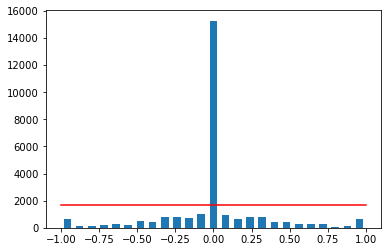

In [4]:
n_bins = 25
samples_per_bin = 1700
hist, bins = np.histogram(data['steering'], n_bins)
center = (bins[:-1] + bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin), 'r')
plt.show()

total data: 27024
removed data: 13569
remaining data: 13455


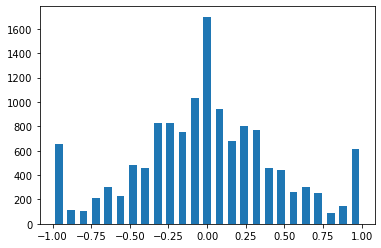

In [5]:
remove_list = list()
for j in range(n_bins):
    list_ = list()
    for i in range(len(data['steering'])):
        if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
            list_.append(i)
    list_ = shuffle(list_)
    list_ = list_[samples_per_bin:]
    remove_list.extend(list_)

print('total data:', len(data))
print('removed data:', len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining data:', len(data))
hist, _ = np.histogram(data['steering'], n_bins)
plt.bar(center, hist, width=0.05)
plt.show()

In [6]:
datadir = 'C:/Users/Dell/Desktop/The Complete Self-Driving Car Course - Applied Deep Learning/Behavioural Cloning/Data'
def load_img_steering(datadir, data):
    image_paths = list()
    steerings = list()
    for i in range(len(data)):
        indexed_data = data.iloc[i]
        center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
        image_paths.append(os.path.join(datadir, center.strip()))
        steerings.append(float(indexed_data[3]))
    image_paths = np.asarray(image_paths)
    steerings = np.asarray(steerings)
    return image_paths, steerings

image_paths, steerings = load_img_steering(datadir + '/IMG', data)

In [7]:
X_train, X_val, y_train, y_val = train_test_split(image_paths, steerings, test_size=0.2, random_state=8)
print('Training Samples: {}\nValidation Samples:{}'.format(len(X_train), len(X_val)))

Training Samples: 10764
Validation Samples:2691


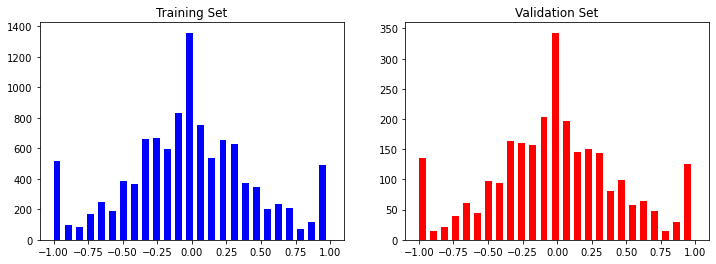

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))

ax[0].hist(y_train, bins=n_bins, width=0.05, color='blue')
ax[0].set_title('Training Set')

ax[1].hist(y_val, bins=n_bins, width=0.05, color='red')
ax[1].set_title('Validation Set')

plt.show()

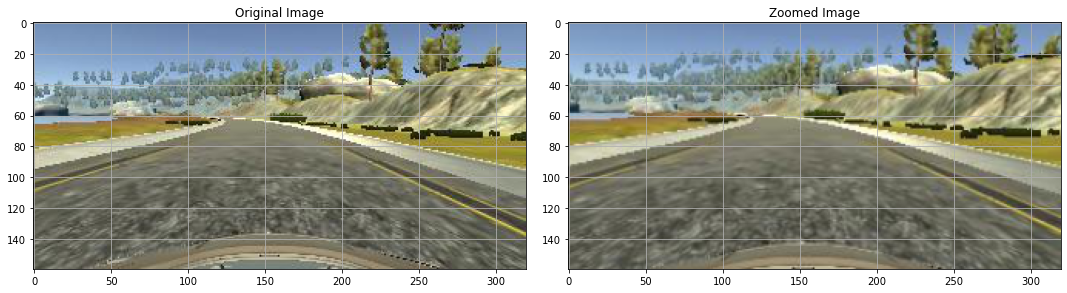

In [9]:
def zoom(image):
    zoom = iaa.Affine(scale=(1, 1.3))
    image = zoom.augment_image(image)
    return image

image = image_paths[100]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)

fig, ax = plt.subplots(1, 2, figsize=(15,10))
fig.tight_layout()
ax[0].imshow(original_image)
ax[0].set_title('Original Image')
ax[0].grid()
ax[1].imshow(zoomed_image)
ax[1].set_title('Zoomed Image')
ax[1].grid()
plt.show()

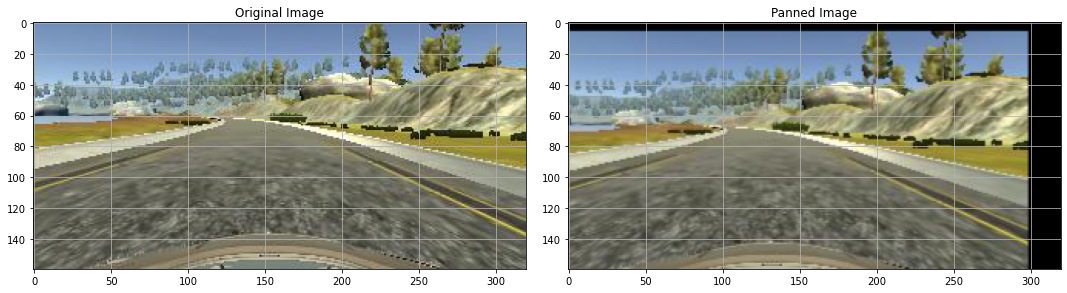

In [10]:
def pan(image):
    pan = iaa.Affine(translate_percent={'x': (-0.1, 0.1), 'y': (-0.1, 0.1)})
    image = pan.augment_image(image)
    return image

image = image_paths[100]
original_image = mpimg.imread(image)
panned_image = pan(original_image)

fig, ax = plt.subplots(1, 2, figsize=(15,10))
fig.tight_layout()
ax[0].imshow(original_image)
ax[0].set_title('Original Image')
ax[0].grid()
ax[1].imshow(panned_image)
ax[1].set_title('Panned Image')
ax[1].grid()
plt.show()

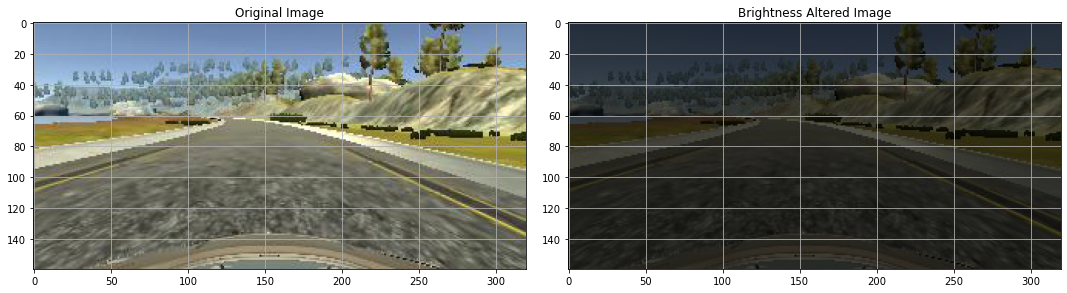

In [11]:
def img_random_brightness(image):
    brightness = iaa.Multiply((0.2, 1.2))
    image = brightness.augment_image(image)
    return image

image = image_paths[100]
original_image = mpimg.imread(image)
brightness_altered_image = img_random_brightness(original_image)

fig, ax = plt.subplots(1, 2, figsize=(15,10))
fig.tight_layout()
ax[0].imshow(original_image)
ax[0].set_title('Original Image')
ax[0].grid()
ax[1].imshow(brightness_altered_image)
ax[1].set_title('Brightness Altered Image')
ax[1].grid()
plt.show()

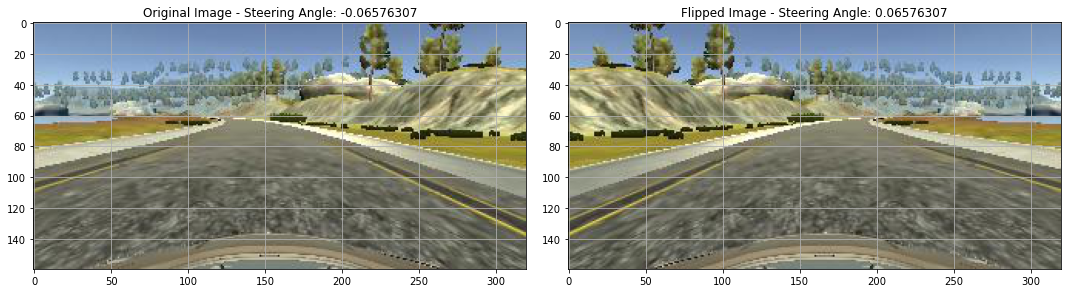

In [12]:
def img_random_flip(image, steering_angle):
    image = cv2.flip(image, 1)
    steering_angle = -steering_angle
    return image, steering_angle

image = image_paths[100]
steering_angle = steerings[100]
original_image = mpimg.imread(image)
flipped_image, flipped_steering_angle = img_random_flip(original_image, steering_angle)

fig, ax = plt.subplots(1, 2, figsize=(15,10))
fig.tight_layout()
ax[0].imshow(original_image)
ax[0].set_title('Original Image - ' + 'Steering Angle: ' + str(steering_angle))
ax[0].grid()
ax[1].imshow(flipped_image)
ax[1].set_title('Flipped Image - ' + 'Steering Angle: ' + str(flipped_steering_angle))
ax[1].grid()
plt.show()

In [13]:
def random_augment(image, steering_angle):
    image = mpimg.imread(image)
    if np.random.rand() < 0.5:
        image = zoom(image)
    if np.random.rand() < 0.5:
        image = pan(image)
    if np.random.rand() < 0.5:
        image = img_random_brightness(image)
    if np.random.rand() < 0.5:
        image, steering_angle = img_random_flip(image, steering_angle)
    return image, steering_angle

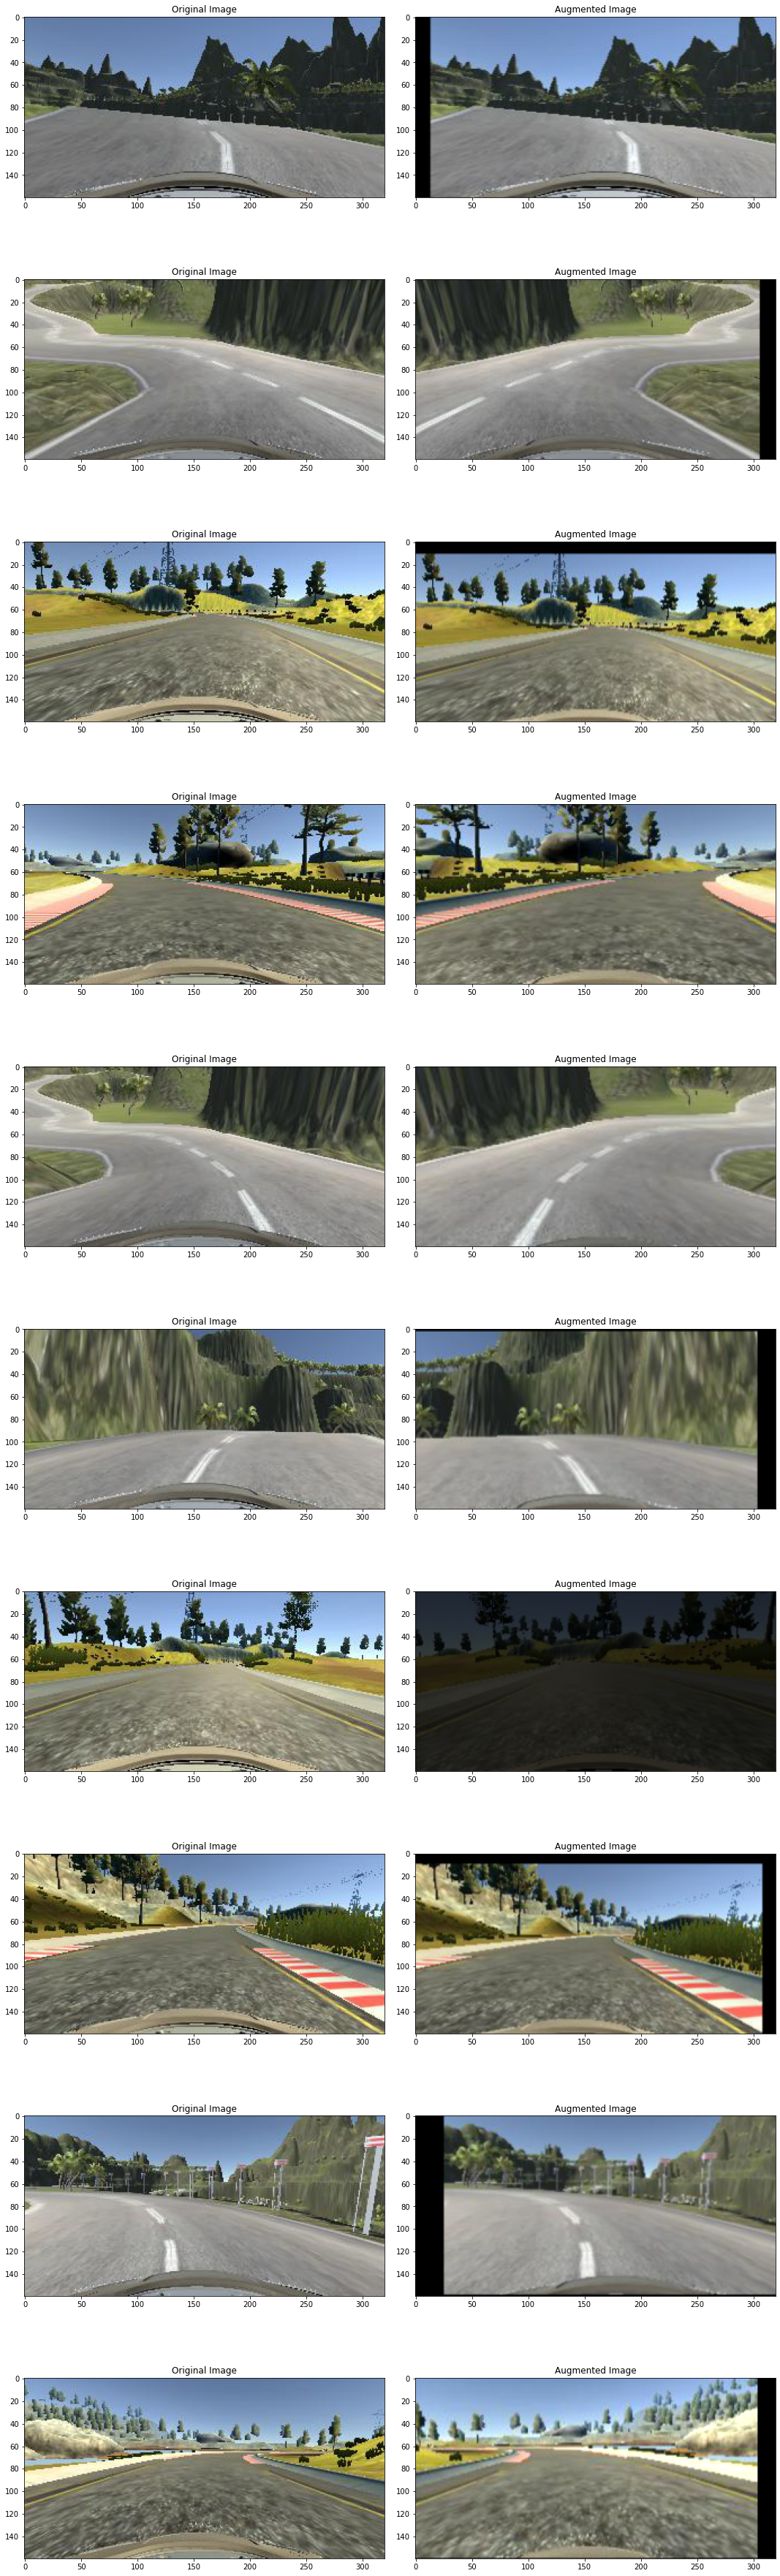

In [14]:
n_cols = 2
n_rows = 10

fig, ax = plt.subplots(n_rows, n_cols, figsize=(15, 50))
fig.tight_layout()

for i in range(n_rows):
    randnum = random.randint(0, len(image_paths) - 1)
    
    random_image = image_paths[randnum]
    random_steering = steerings[randnum]
    
    original_image = mpimg.imread(random_image)
    augmented_image, _ = random_augment(random_image, random_steering)
    
    ax[i][0].imshow(original_image)
    ax[i][0].set_title('Original Image')
    
    ax[i][1].imshow(augmented_image)
    ax[i][1].set_title('Augmented Image')

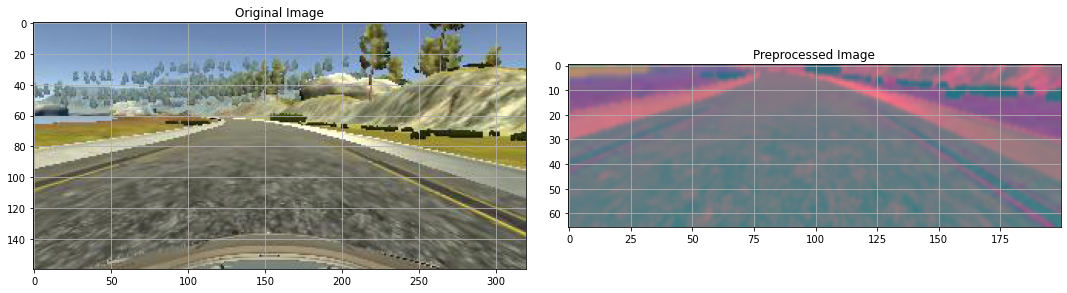

In [15]:
def img_preprocess(img):
    img = img[60:135, :, :]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img, (3,3), 0)
    img = cv2.resize(img, (200, 66))
    img = img / 255.0
    return img

image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(original_image)

fig, ax = plt.subplots(1, 2, figsize=(15,10))
fig.tight_layout()
ax[0].imshow(original_image)
ax[0].set_title('Original Image')
ax[0].grid()
ax[1].imshow(preprocessed_image)
ax[1].set_title('Preprocessed Image')
ax[1].grid()
plt.show()

In [16]:
def batch_generator(image_paths, steering_ang, batch_size, istraining):
    while True:
        batch_img = list()
        batch_steering = list()
        for i in range(batch_size):
            random_index = random.randint(0, len(image_paths) - 1)
            if istraining:
                img, steering = random_augment(image_paths[random_index], steering_ang[random_index])
            else:
                img = mpimg.imread(image_paths[random_index])
                steering = steering_ang[random_index]
            img = img_preprocess(img)
            batch_img.append(img)
            batch_steering.append(steering)
        yield (np.asarray(batch_img), np.asarray(batch_steering))

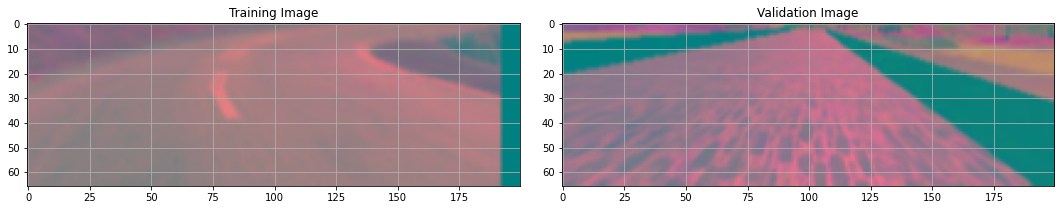

In [17]:
X_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1))
X_val_gen, y_val_gen = next(batch_generator(X_train, y_train, 1, 0))

fig, ax = plt.subplots(1, 2, figsize=(15,10))
fig.tight_layout()
ax[0].imshow(X_train_gen[0])
ax[0].set_title('Training Image')
ax[0].grid()
ax[1].imshow(X_val_gen[0])
ax[1].set_title('Validation Image')
ax[1].grid()
plt.show()

In [18]:
#resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(66, 200, 3))
#
#for layer in resnet.layers[: -4]:
#    layer.trainable = False
#    
#for layer in resnet.layers:
#    print(layer, layer.trainable)

In [19]:
#def nvidia_model():
#    
#    model = Sequential()
#    
#    model.add(Conv2D(32, (3, 3), activation='elu', strides=(2,2), input_shape=(66,200,3)))
#    model.add(MaxPooling2D(pool_size=(2,2)))
#    model.add(Dropout(0.25))
#    
#    model.add(Conv2D(64, (3, 3), activation='elu', strides=(2,2)))
#    model.add(MaxPooling2D(pool_size=(2,2)))
#    model.add(Dropout(0.25))
#    
#    model.add(Conv2D(128, (3, 3), activation='elu', strides=(2,2)))
#    model.add(Dropout(0.5))
#    
#    model.add(Flatten())
#    
#    model.add(Dense(1024, activation='relu'))
#    model.add(Dropout(0.5))
#    
#    model.add(Dense(1))
#    
#    model.compile(loss='mse', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])
#    
#    return model

In [20]:
def nvidia_model():
    
    model = Sequential()
    
    model.add(Conv2D(24, (5, 5), strides=(2,2), input_shape=(66, 200, 3), activation='elu'))
    
    model.add(Conv2D(36, (5, 5), strides=(2,2), activation='elu'))
    
    model.add(Conv2D(48, (5, 5), strides=(2,2), activation='elu'))
    
    model.add(Conv2D(64, (3, 3), activation='elu'))
    
    model.add(Conv2D(64, (3, 3), activation='elu'))
    #model.add(Dropout(0.25))
    
    model.add(Flatten())
    
    model.add(Dense(100, activation='elu'))
    #model.add(Dropout(0.5))
    
    model.add(Dense(50, activation='elu'))
    #model.add(Dropout(0.5))
    
    model.add(Dense(10, activation='elu'))
    #model.add(Dropout(0.5))
    
    model.add(Dense(1))
    
    model.compile(loss='mse', optimizer=Adam(learning_rate=1e-4))
    
    return model

In [21]:
model = nvidia_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 98, 24)        1824      
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 20, 64)         27712     
                                                                 
 conv2d_4 (Conv2D)           (None, 1, 18, 64)         36928     
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 100)               1

In [22]:
history = model.fit_generator(batch_generator(X_train, y_train, 64, 1), 
                              steps_per_epoch=7500, 
                              epochs=10, 
                              validation_data=batch_generator(X_val, y_val, 64, 0), 
                              validation_steps=1000, 
                              verbose=1, 
                              shuffle=1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_1184\2927099429.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(batch_generator(X_train, y_train, 64, 1),


Epoch 1/10
7500/7500 [==============================] - 2722s 363ms/step - loss: 0.1004 - val_loss: 0.0745
Epoch 2/10
7500/7500 [==============================] - 3097s 413ms/step - loss: 0.0766 - val_loss: 0.0665
Epoch 3/10
7500/7500 [==============================] - 3197s 426ms/step - loss: 0.0695 - val_loss: 0.0639
Epoch 4/10
7500/7500 [==============================] - 3239s 432ms/step - loss: 0.0645 - val_loss: 0.0603
Epoch 5/10
7500/7500 [==============================] - 2728s 364ms/step - loss: 0.0612 - val_loss: 0.0599
Epoch 6/10
7500/7500 [==============================] - 2766s 369ms/step - loss: 0.0579 - val_loss: 0.0578
Epoch 7/10
7500/7500 [==============================] - 3136s 418ms/step - loss: 0.0550 - val_loss: 0.0566
Epoch 8/10
7500/7500 [==============================] - 3252s 434ms/step - loss: 0.0526 - val_loss: 0.0571
Epoch 9/10
7500/7500 [==============================] - 3463s 462ms/step - loss: 0.0507 - val_loss: 0.0558
Epoch 10/10
7500/7500 [==============

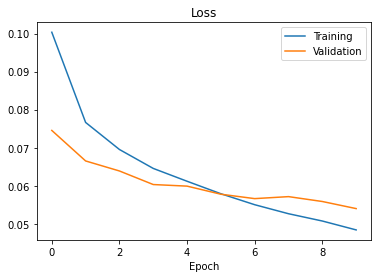

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.show()

In [24]:
model.save('model.h5')